# House Prices: Advanced Regression Techniques
[캐글]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques <br>
[참고 커널모음] :https://subinium.github.io/kaggle-tutorial/house-prices <br>

#### Python Tutorials
아래 튜토리얼 하나씩 필사할 예정

> * Comprehensive Data Exploration with Python (필사 시작일 : 2020-09-01)
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

> * House Prices EDA
https://www.kaggle.com/dgawlik/house-prices-eda

> * A Study on Regression Applied to the Ames Dataset
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

> * Regularized Linear Models
https://www.kaggle.com/apapiu/regularized-linear-models


--------------------------------------------------------------------------------------------------
## What I learned
* type here

--------------------------------------------------------------------------------------------------



In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_submission=pd.read_csv('./data/sample_submission.csv')
df_test=pd.read_csv('./data/test.csv')

In [3]:
df_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [13]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

--------------------------------------------------------------------------------------------------
### 1. So... What can we expect?
* Variable
* Type - 여기서는 numerical, categorical 두가지 타입이 있다. 
* Segment - building(e.g. 'OverallQual'), space(e.g. 'TotalBsmtSF'), location(e.g. 'Neighborhood') 세가지 분류로 변수를 나눠볼수있다.
* Expectation - 변수가 'SalePrice'에 영향을 미친다는 기대를 갖고있다. 
* Conclusion 

--------------------------------------------------------------------------------------------------
### 2. First things first: analysing 'SalePrice'

In [19]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

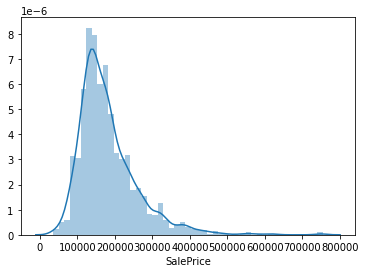

In [20]:
sns.distplot(df_train['SalePrice'])

In [22]:
#skewness and kurtosis
## 왜도, 첨도
print("Skewness: %f" % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Relationship with numerical variables

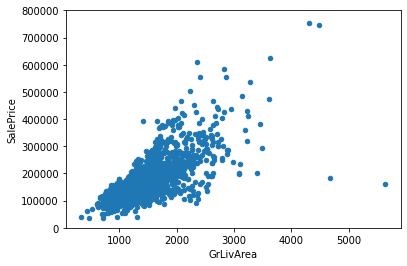

In [25]:
#scatter plot grlivarea/saleprice
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

'SalePrice' 와 'GrLivArea' 사이에는 선형관계가 있는것으로 보여짐.

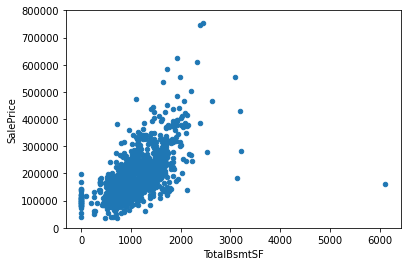

In [26]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Relationship with categorical features

(-0.5, 9.5, 0.0, 800000.0)

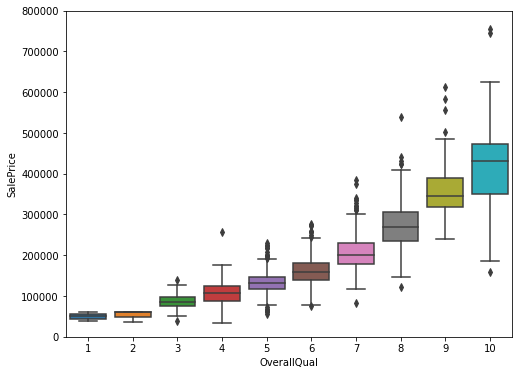

In [29]:
#box plot overallqual/saleprice
## OverallQual: Overall material and finish quality
var='OverallQual'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y="SalePrice",data=data)
fig.axis(ymin=0, ymax=800000)

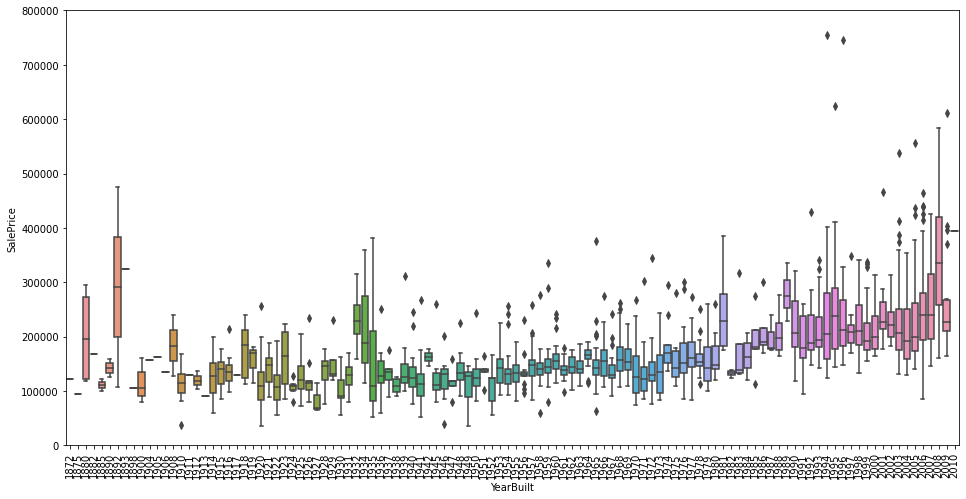

In [32]:
var='YearBuilt'
data=pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
f,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var, y="SalePrice",data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

최근 지은 건물이 가격이 조금 높아보이기는하나, 무조건 최근 건물이라고 비싼건 아님. 과거에 지은 건물인데도 비싼 경우가 보임.

------------------------------------------------------------------------------------------------
### 3. Keep calm and work smart

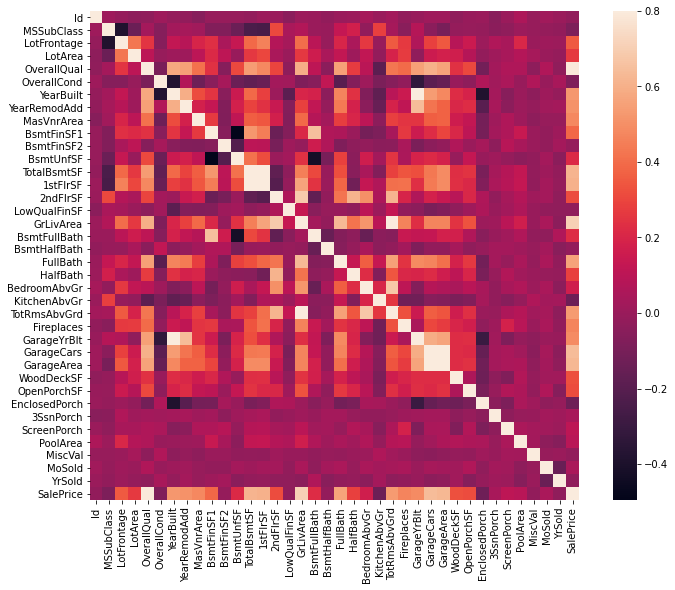

In [6]:
#correlation matrix
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

'TotalBsmtSF' 와 '1stFlrSF' 변수 간의 상관관계, 그리고 'GarageX' 변수가 눈에 띈다. <br>
이 변수들은 상관관계가 높아서 다중공선성이 의심됨.<br>

 'SalePrice' 와의 상관관계를 보면,  'GrLivArea', 'TotalBsmtSF', 그리고 'OverallQual' 변수가 높다.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

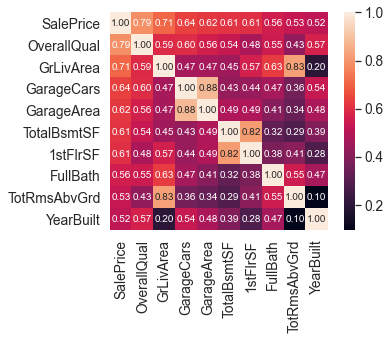

In [23]:
#saleprice correlation matrix
k=10 #number of variables for heatmap
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index   # SalePrice와 상관관계가 높은 상위10개

# np.corrcoef()는 행을 기준으로 값들을 변수로 생각해서 상관계수를 구하기때문에 transform해준것.
cm=np.corrcoef(df_train[cols].values.T)  # 피어슨 상관계수 값을 계산해준다.
sns.set(font_scale=1.25)
# yticklabels, xticklabels로 라벨을 따로 달아준것.
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
              yticklabels=cols.values, xticklabels=cols.values);

* 'OverallQual', 'GrLivArea' , 'TotalBsmtSF' 변수들은 'SalePrice'와 강하게 상관성을 띈다.
* 'GarageCars' 와  'GarageArea' 또한 상관관계가 높은 변수이다.
    * 그런데, GarageCars' 와  'GarageArea' 는 한쌍이라고 볼수있음. 주차장 면적이 넓을수록, 수용할수있는 차의 대수가 많아지기 때문에 
    * 이경우 종속변수와 상관관계가 더 높은 'GarageCars' 변수만 가져가기로 하자.
* 'TotalBsmtSF'와 '1stFloor' 또한 한쌍으로 보인다. 여기서 우리는 'TotalBsmtSF'변수를 가져가기로 한다.
* 'TotRmsAbvGrd' 와'GrLivArea' 또한 한쌍이다. 집 면적이 넓을수록 방의 개수도 많을것임.
* 'YearBuilt' 는 종속변수와 약간의 상관성을 갖고있는데, 시계열로 접근해야할것 같다는 느낌이 듬.

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

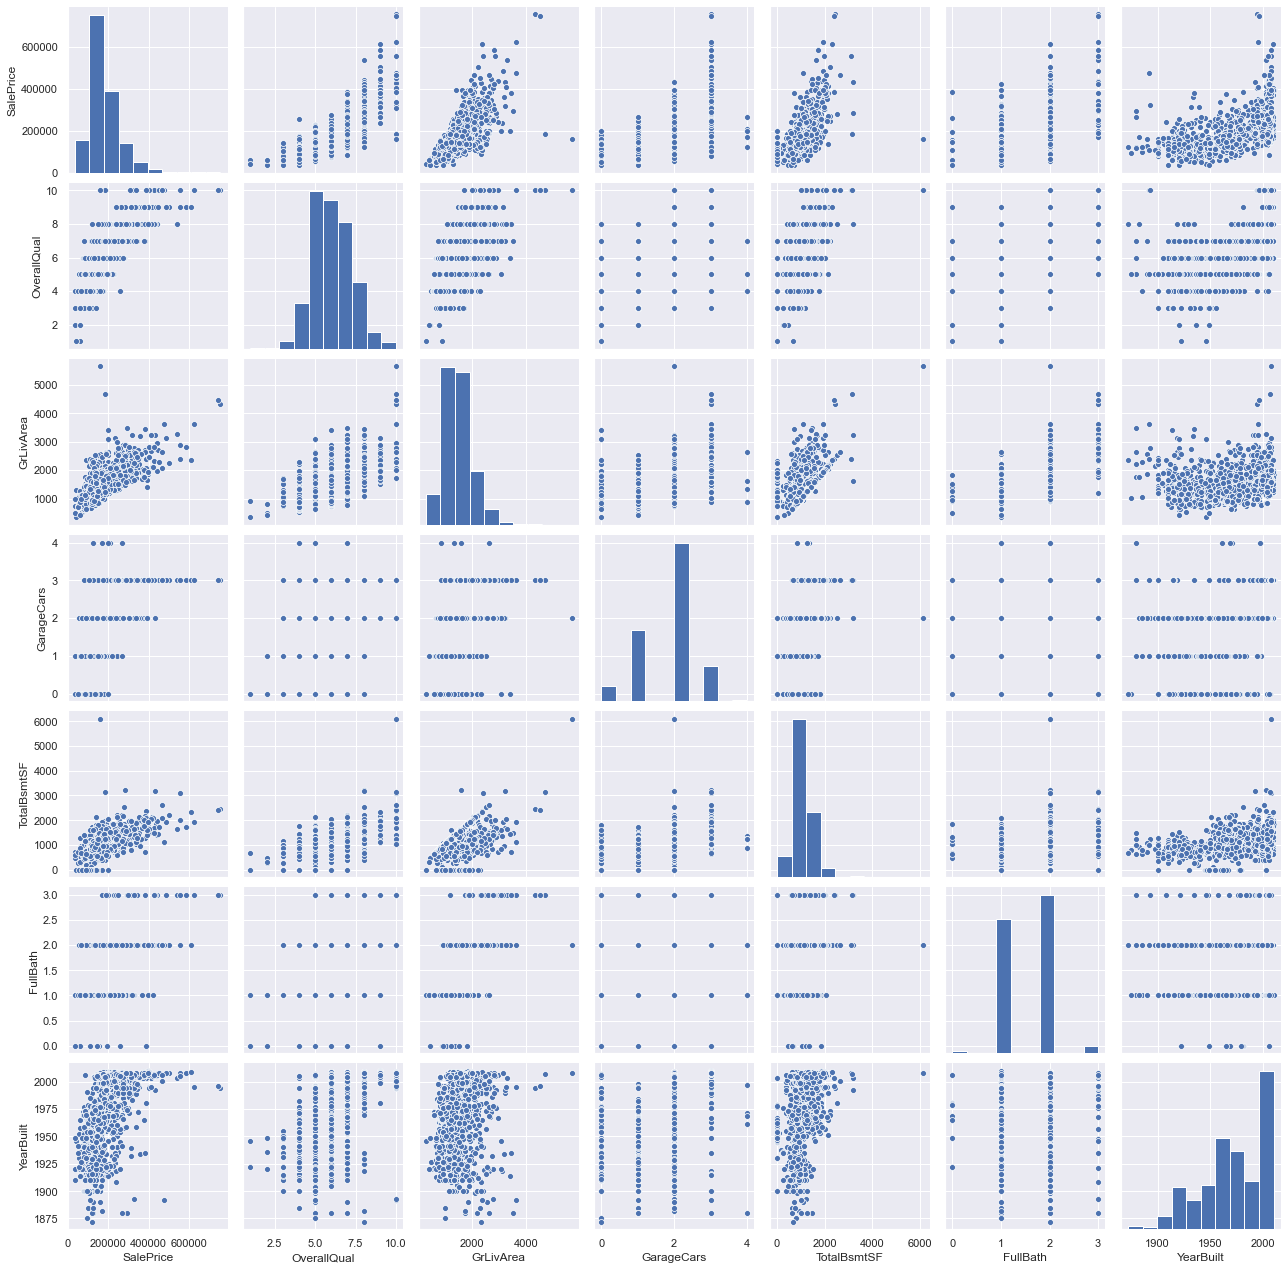

In [27]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5);

'TotalBsmtSF' 와 'GrLiveArea'의 관계를 보면, 점들이 선형적인 관계로 나타나는 것을 확인할 수 있다. <br>
사실 Basement areas는 above ground living area와 비슷하다고볼 수 있다. <br>

'SalePrice' 와 'YearBuilt'간의 관계를 보면 지수함수 형태로 생긴것을 확인할 수 있다. 

------------------------------------------------------------------------------
### 4. Missing data
* missing data가 얼마나 퍼져있는지?
* missing data가 랜덤한지, 패턴이 있는지?

missing data는 샘플 사이즈 감소로 이어질수있기 때문에 위 두질문은 중요하다. 

In [38]:
#missing data
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


* 만약 15%이상이 결측이면 상응하는 변수를 제거할것이다.
    * 즉, 이경우에는 결측치를 채우기위한 트릭을 사용하지 않을 것이다.
* 그러므로 결측이 많은 (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.)  변수는 제거
*  'GarageX'  변수들은 결측치 비율이 모두 동일하다. 'GarageCars' 변수가 garage관련 변수들중 가장 중요한 정보를 담고있으므로 다른 변수들은 제거
*  'BsmtX' 변수들도 같은맥락으로 제거
* MasVnrArea' 와'MasVnrType'는 중요한 변수라고 보이진 않음. 또한, 이들은 'YearBuilt'와 'OverallQual'와 상관관계가 높으므로 이 변수를 삭제하더라도 무관할것이다.
* 'Electrical' 는 결측치가 오직 1개이므로 유지. 결측치가있는 관측치는 제거.

In [51]:
#dealing with missing data
df_train=df_train.drop((missing_data[missing_data['Total'] >1]).index,1)  # 컬럼자체를 제거
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)   # 결측치가있는 부분의 행 제거
df_train.isnull().sum().max()

0

### Out liars